# 6.6 Sourcing and Analyzing Time Series Data

# 1. Install the Quandl library and register for a Quandl account as described in the Exercise.

# 2. Find a data set to work and import it into your Jupyter notebook.

After speaking with my mentor, we decided that it might be best if I add in a time related element, such as 'year', to the realtor dataframe I have already been working with.

In [21]:
#Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [9]:
#Import latest version of the data frame
df_realtor = pd.read_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor_6.4')

In [11]:
#Check the head
df_realtor.head()

,price,bed,bath,acre_lot,state,house_size,price_range
3403,180000,2,1,0.34,Massachusetts,676.0,Low Range
3405,169900,2,2,0.21,Massachusetts,892.0,Low Range
3406,242000,2,2,0.21,Massachusetts,1428.0,Low Range
3407,299950,2,2,0.21,Massachusetts,1659.0,Low Range
3408,239900,3,1,0.46,Massachusetts,1196.0,Low Range


In [13]:
#Add new column 'list_year' assigning random values to each row that are between 2016-2023
df_realtor['list_year'] = np.random.randint(2016, 2024, df_realtor.shape[0])

In [17]:
#Check to ensure it worked
df_realtor.head()

,price,bed,bath,acre_lot,state,house_size,price_range,list_year
3403,180000,2,1,0.34,Massachusetts,676.0,Low Range,2020
3405,169900,2,2,0.21,Massachusetts,892.0,Low Range,2021
3406,242000,2,2,0.21,Massachusetts,1428.0,Low Range,2019
3407,299950,2,2,0.21,Massachusetts,1659.0,Low Range,2020
3408,239900,3,1,0.46,Massachusetts,1196.0,Low Range,2017


# 3. Make a subset of your data set if necessary.

I don't think it is necessary to subset this data. 

# 4. Create a line chart of your data.

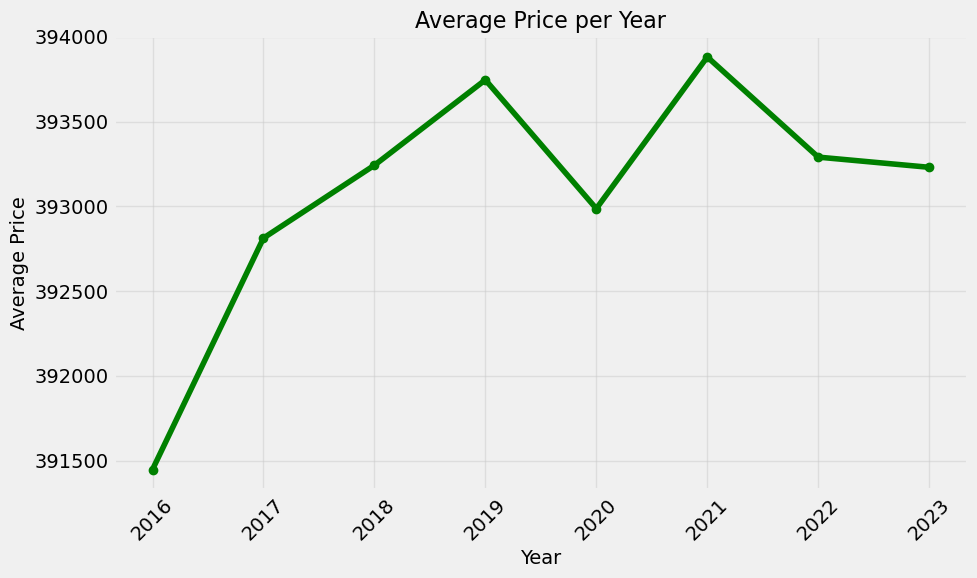

In [24]:
#I think it would make the most sense to see the average price of a listing by year
#Find the average 'price' by year
avg_price_per_year = df_realtor.groupby('list_year')['price'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', linestyle='-', color='g')
plt.title('Average Price per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(avg_price_per_year.index, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# 5. Decompose the data’s components.
Analyze the results from the plot in a markdown cell.

<Figure size 1000x800 with 0 Axes>

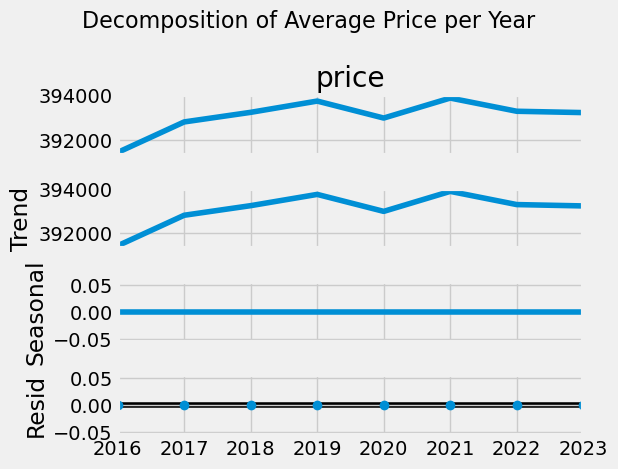

In [27]:
#Perform additive decomposition
decomposition = sm.tsa.seasonal_decompose(avg_price_per_year, model='additive', period=1)

#Plot the decomposition
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.suptitle('Decomposition of Average Price per Year', fontsize=16)
plt.tight_layout()
plt.show()

This line chart shows gradual growth in house listing price from 2016-2019, then a slight dip in 2020.  In 2021, the average price got the highest it has been yet, and then a slight decline in 2022 and 2023.  The seasonal tab shows us that there is no seasonality trend in this data.  Also, there doesn't seem to be any residual leftover. 

# 6. Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.

In [33]:
#Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

#Define the Dickey-Fuller test function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity Test:')
    
#Perform the Dickey-Fuller test
    test = adfuller(timeseries, autolag='AIC')
    
#Format the results
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    
    print(result)

# Apply the test on the average price time series
dickey_fuller(avg_price_per_year)

Dickey-Fuller Stationarity Test:
Test Statistic                -54.669507
p-value                         0.000000
Number of Lags Used             2.000000
Number of Observations Used     5.000000
Critical Value (1%)            -6.045114
Critical Value (5%)            -3.929280
Critical Value (10%)           -2.986810
dtype: float64


Our null hypothesis here is: The time series has a unit root and is non-stationary.

From the results of the Dickey-Fuller test, we can see that the test statistic is less than the critical values.  Also, the p-value is less than .05.  This tells us that the data set is stationary and does not have any unit root.

From this we can reject the null hypothesis and accept that the time series data has no unit root and is stationary.

# 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
# 8.If your data still isn’t stationary, perform another round of differencing and repeat step 6.

No need.  Data is stationary.

# 9. Check your data’s autocorrelations.

<Figure size 1000x600 with 0 Axes>

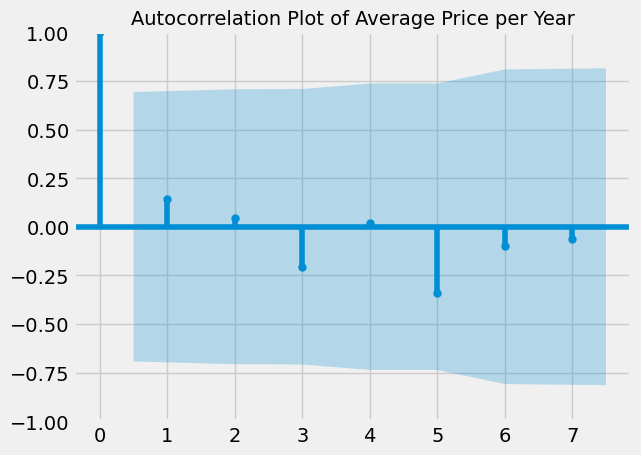

In [43]:
#Import library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Create autocorrelation plot
plt.figure(figsize=(10, 6))
plot_acf(avg_price_per_year, lags=7)  # Use `lags=7` since there are 8 years of data
plt.title('Autocorrelation Plot of Average Price per Year', fontsize=14)
plt.show()

In [47]:
#Save the updated dataframe as a csv file so it can be used in Tableau
df_realtor.to_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor.csv', index=False)

After reviewing the data in the dataframe, there are too many listings in the data with the 'price' either being 0 or less than 50,000 which is unrealistic for a real estate listing in the USA.  I have decided to remove all values less than 50,000.

In [50]:
#Remove listings where price is less than $50,000
df_realtor = df_realtor[df_realtor['price'] >= 50000]

In [52]:
#Save the updated dataframe as a csv file so it can be used in Tableau
df_realtor.to_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor_new.csv', index=False)

In [54]:
df_realtor.shape

(1530447, 8)

In [58]:
#Import latest version of the data frame
df_realtor_new = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor_new.csv')

In [60]:
df_realtor_new.shape

(1530447, 8)